In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('myanimelist.csv')
df

,title,score,episode,aired,user
0,Fullmetal Alchemist: Brotherhood,9.10,TV (64 eps),Apr 2009 - Jul 2010,"3,203,554 members"
1,Steins;Gate,9.07,TV (24 eps),Apr 2011 - Sep 2011,"2,461,811 members"
2,Bleach: Sennen Kessen-hen,9.06,TV (13 eps),Oct 2022 - Dec 2022,"463,851 members"
3,Gintama°,9.06,TV (51 eps),Apr 2015 - Mar 2016,"601,875 members"
4,Shingeki no Kyojin Season 3 Part 2,9.05,TV (10 eps),Apr 2019 - Jul 2019,"2,131,225 members"
...,...,...,...,...,...
995,Akage no Anne,7.77,TV (50 eps),Jan 1979 - Dec 1979,"31,363 members"
996,Digimon Adventure,7.77,TV (54 eps),Mar 1999 - Mar 2000,"391,438 members"
997,Dragon Ball Z Special 2: Zetsubou e no Hankou!...,7.77,Special (1 eps),Feb 1993 - Feb 1993,"106,640 members"
998,Ginga Eiyuu Densetsu: Die Neue These - Kaikou,7.77,TV (12 eps),Apr 2018 - Jun 2018,"82,377 members"


In [36]:
df.shape

(1000, 5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    1000 non-null   object 
 1   score    1000 non-null   float64
 2   episode  1000 non-null   object 
 3   aired    1000 non-null   object 
 4   user     1000 non-null   object 
 5   type     1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,1000.0,8.13552,0.292023,7.77,7.89,8.08,8.3,9.1


## Feature extraction

In [39]:
df[['type', 'episode']] = df['episode'].str.split(' \(', expand=True)
df['episode'] = df['episode'].str.replace('\)', '')
df[['title', 'type', 'episode']]

C:\Users\biman\AppData\Local\Temp\ipykernel_18496\2612074606.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['episode'] = df['episode'].str.replace('\)', '')


,title,type,episode
0,Fullmetal Alchemist: Brotherhood,TV,64 eps
1,Steins;Gate,TV,24 eps
2,Bleach: Sennen Kessen-hen,TV,13 eps
3,Gintama°,TV,51 eps
4,Shingeki no Kyojin Season 3 Part 2,TV,10 eps
...,...,...,...
995,Akage no Anne,TV,50 eps
996,Digimon Adventure,TV,54 eps
997,Dragon Ball Z Special 2: Zetsubou e no Hankou!...,Special,1 eps
998,Ginga Eiyuu Densetsu: Die Neue These - Kaikou,TV,12 eps


## The type of anime that has the most favorite titles

In [47]:
# Group by 'type' and count the occurrences of 'title' in each group
result_df = df.groupby('type')['title'].count().reset_index()

# Rename the 'title' column to 'count' for better clarity
result_df.rename(columns={'title': 'count'}, inplace=True)

# Sort the DataFrame in descending order based on the 'count' column
result_df = result_df.sort_values(by='count', ascending=False)

# make type as a index
result_df.set_index('type', inplace=True)

# Print the resulting DataFrame
result_df

,count
type,
TV,563
Movie,240
OVA,86
Special,61
ONA,50


In [51]:
# df to dict
result_df.to_dict()

{'count': {'TV': 563, 'Movie': 240, 'OVA': 86, 'Special': 61, 'ONA': 50}}

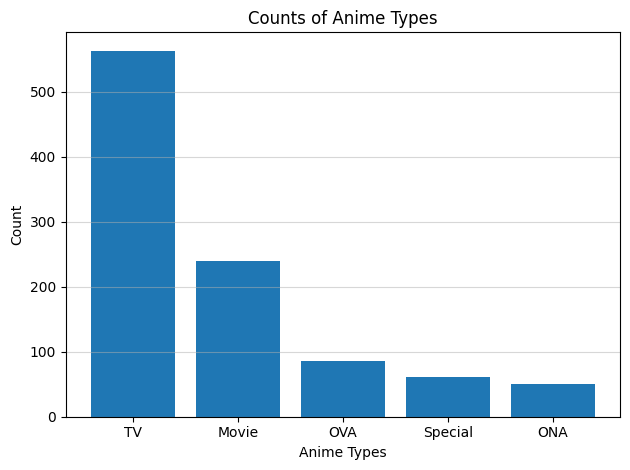

In [55]:
plt.bar(result_df.index, result_df['count'])
plt.title('Counts of Anime Types')
plt.xlabel('Anime Types')
plt.ylabel('Count')
plt.tight_layout() # adjust the layout to prevent labels from being cut off
plt.grid(True, axis='y', alpha=0.5)
plt.show()


## The year that has the most favorite anime titles

In [42]:
# Split the "aired" column by the delimiter "-"
aired_dates = df['aired'].str.split('-')

# Extract the start date from the split list and split it by the delimiter " "
start_dates = aired_dates.str[0].str.split(' ')

# Extract the year component
years = start_dates.str[1]

# Assign the extracted year to a new column "first_aired"
df['first_aired'] = years
df

,title,score,episode,aired,user,type,first_aired
0,Fullmetal Alchemist: Brotherhood,9.10,64 eps,Apr 2009 - Jul 2010,"3,203,554 members",TV,2009
1,Steins;Gate,9.07,24 eps,Apr 2011 - Sep 2011,"2,461,811 members",TV,2011
2,Bleach: Sennen Kessen-hen,9.06,13 eps,Oct 2022 - Dec 2022,"463,851 members",TV,2022
3,Gintama°,9.06,51 eps,Apr 2015 - Mar 2016,"601,875 members",TV,2015
4,Shingeki no Kyojin Season 3 Part 2,9.05,10 eps,Apr 2019 - Jul 2019,"2,131,225 members",TV,2019
...,...,...,...,...,...,...,...
995,Akage no Anne,7.77,50 eps,Jan 1979 - Dec 1979,"31,363 members",TV,1979
996,Digimon Adventure,7.77,54 eps,Mar 1999 - Mar 2000,"391,438 members",TV,1999
997,Dragon Ball Z Special 2: Zetsubou e no Hankou!...,7.77,1 eps,Feb 1993 - Feb 1993,"106,640 members",Special,1993
998,Ginga Eiyuu Densetsu: Die Neue These - Kaikou,7.77,12 eps,Apr 2018 - Jun 2018,"82,377 members",TV,2018


In [73]:
# Group by 'type' and count the occurrences of 'title' in each group
result_df = df.groupby('first_aired')['title'].count().reset_index()

# Rename the 'title' column to 'count' for better clarity
result_df.rename(columns={'title': 'count'}, inplace=True)

# Sort the DataFrame in descending order based on the 'count' column
# result_df = result_df.sort_values(by='count', ascending=False)

# make first_aired as a index
result_df.set_index('first_aired', inplace=True)

# Print the resulting DataFrame
result_df.tail()

,count
first_aired,
2019,55
2020,48
2021,70
2022,68
2023,37


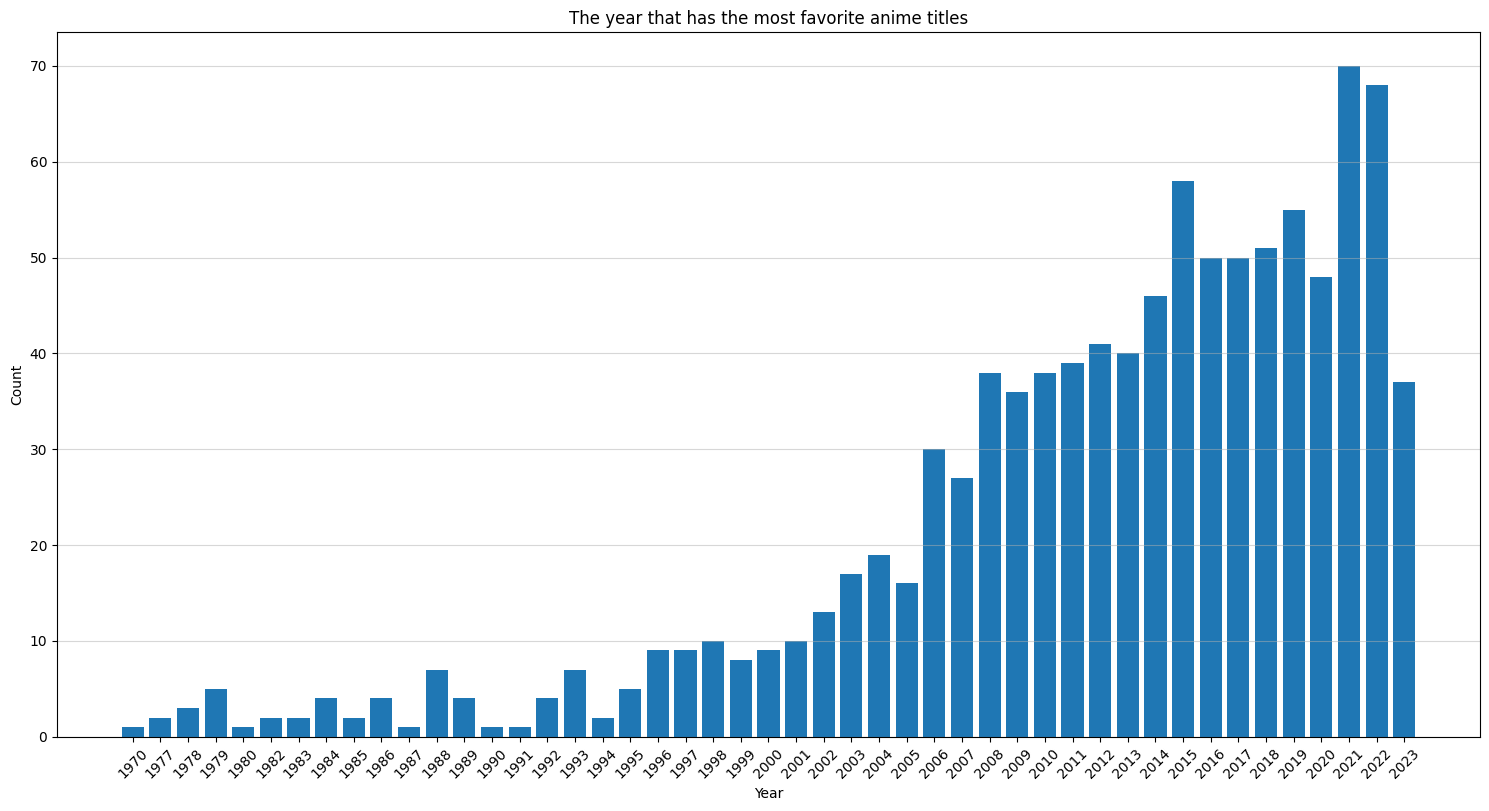

In [84]:
plt.figure(figsize=(15, 8))
plt.bar(result_df.index, result_df['count'])
plt.title('The year that has the most favorite anime titles')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout() # adjust the layout to prevent labels from being cut off
plt.grid(True, axis='y', alpha=0.5)
plt.xticks(rotation=45)
# plt.xlim(-0.5, 9.5)
plt.show()

## The anime title that has the most members

In [88]:
import re

def convert_to_int(value):
    value = re.sub(',', '', value)  # Remove commas
    value = value.replace('members', '')  # Remove 'members'
    value = int(value)              # Convert to integer
    return value

In [89]:
df['member'] = df['user'].apply(convert_to_int)
df[['title', 'member']]

,title,member
0,Fullmetal Alchemist: Brotherhood,3203554
1,Steins;Gate,2461811
2,Bleach: Sennen Kessen-hen,463851
3,Gintama°,601875
4,Shingeki no Kyojin Season 3 Part 2,2131225
...,...,...
995,Akage no Anne,31363
996,Digimon Adventure,391438
997,Dragon Ball Z Special 2: Zetsubou e no Hankou!...,106640
998,Ginga Eiyuu Densetsu: Die Neue These - Kaikou,82377


In [104]:
most_member = df[['title', 'member']]
most_member = most_member.sort_values(by='member', ascending=False)
most_member.reset_index(drop=True, inplace=True)
most_member.head(10)

,title,member
0,Shingeki no Kyojin,3776539
1,Death Note,3744680
2,Fullmetal Alchemist: Brotherhood,3203554
3,One Punch Man,3085073
4,Boku no Hero Academia,2906321
5,Kimetsu no Yaiba,2849882
6,Naruto,2740792
7,Tokyo Ghoul,2719229
8,Hunter x Hunter (2011),2685156
9,Kimi no Na wa.,2622181


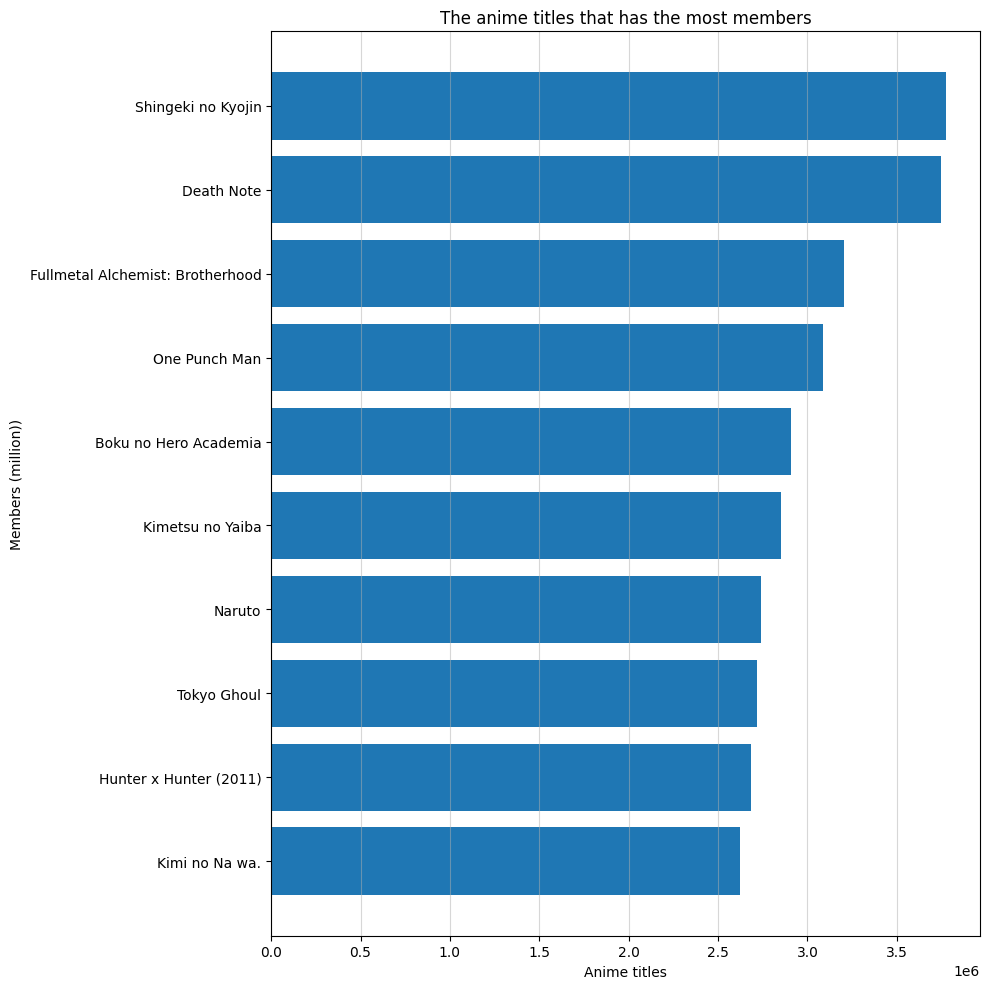

In [102]:
most_member = most_member.head(10)
most_member = most_member.sort_values(by='member', ascending=True)

plt.figure(figsize=(10, 10))
plt.barh(most_member['title'], most_member['member'])
plt.title('The anime titles that has the most members')
plt.xlabel('Anime titles')
plt.ylabel('Members (million))')
plt.tight_layout() # adjust the layout to prevent labels from being cut off
plt.grid(True, axis='x', alpha=0.5)
# plt.xticks(rotation=45)
# plt.xlim(-0.5, 9.5)
plt.show()

## Search for specific anime titles

In [110]:
string_to_check = 'one piece'
is_present = df['title'].str.contains(string_to_check, case=False).any()
is_present

True

In [112]:
filtered_df = df[df['title'].str.contains(string_to_check, case=False)]
filtered_df

,title,score,episode,aired,user,type,first_aired,member
56,One Piece,8.70,? eps,Oct 1999 -,"2,201,046 members",TV,1999,2201046
333,One Piece Movie 14: Stampede,8.22,1 eps,Aug 2019 - Aug 2019,"174,582 members",Movie,2019,174582
368,One Piece: Episode of Merry - Mou Hitori no Na...,8.19,1 eps,Aug 2013 - Aug 2013,"59,446 members",Special,2013,59446
431,One Piece Film: Z,8.14,1 eps,Dec 2012 - Dec 2012,"268,358 members",Movie,2012,268358
444,One Piece: Episode of Nami - Koukaishi no Nami...,8.12,1 eps,Aug 2012 - Aug 2012,"67,319 members",Special,2012,67319
501,One Piece Film: Strong World,8.08,1 eps,Dec 2009 - Dec 2009,"242,256 members",Movie,2009,242256
678,One Piece Film: Strong World Episode 0,7.94,1 eps,Apr 2010 - Apr 2010,"82,159 members",OVA,2010,82159
744,One Piece Film: Gold,7.90,1 eps,Jul 2016 - Jul 2016,"203,475 members",Movie,2016,203475
774,One Piece: Episode of East Blue - Luffy to 4-n...,7.88,1 eps,Aug 2017 - Aug 2017,"38,445 members",Special,2017,38445
810,One Piece 3D2Y: Ace no shi wo Koete! Luffy Nak...,7.86,1 eps,Aug 2014 - Aug 2014,"88,714 members",Special,2014,88714


## Top anime titles count based on the number of episodes

In [114]:
df.head(1)

,title,score,episode,aired,user,type,first_aired,member
0,Fullmetal Alchemist: Brotherhood,9.1,64 eps,Apr 2009 - Jul 2010,"3,203,554 members",TV,2009,3203554


In [116]:
# Group by 'type' and count the occurrences of 'title' in each group
result_df = df.groupby('episode')['title'].count().reset_index()

# Rename the 'title' column to 'count' for better clarity
result_df.rename(columns={'title': 'count'}, inplace=True)

# Sort the DataFrame in descending order based on the 'count' column
result_df = result_df.sort_values(by='count', ascending=False)

# make first_aired as a index
# result_df.set_index('first_aired', inplace=True)

# Print the resulting DataFrame
result_df

,episode,count
0,1 eps,303
11,12 eps,158
13,13 eps,105
38,26 eps,54
36,24 eps,54
...,...,...
45,34 eps,1
46,35 eps,1
12,120 eps,1
48,366 eps,1


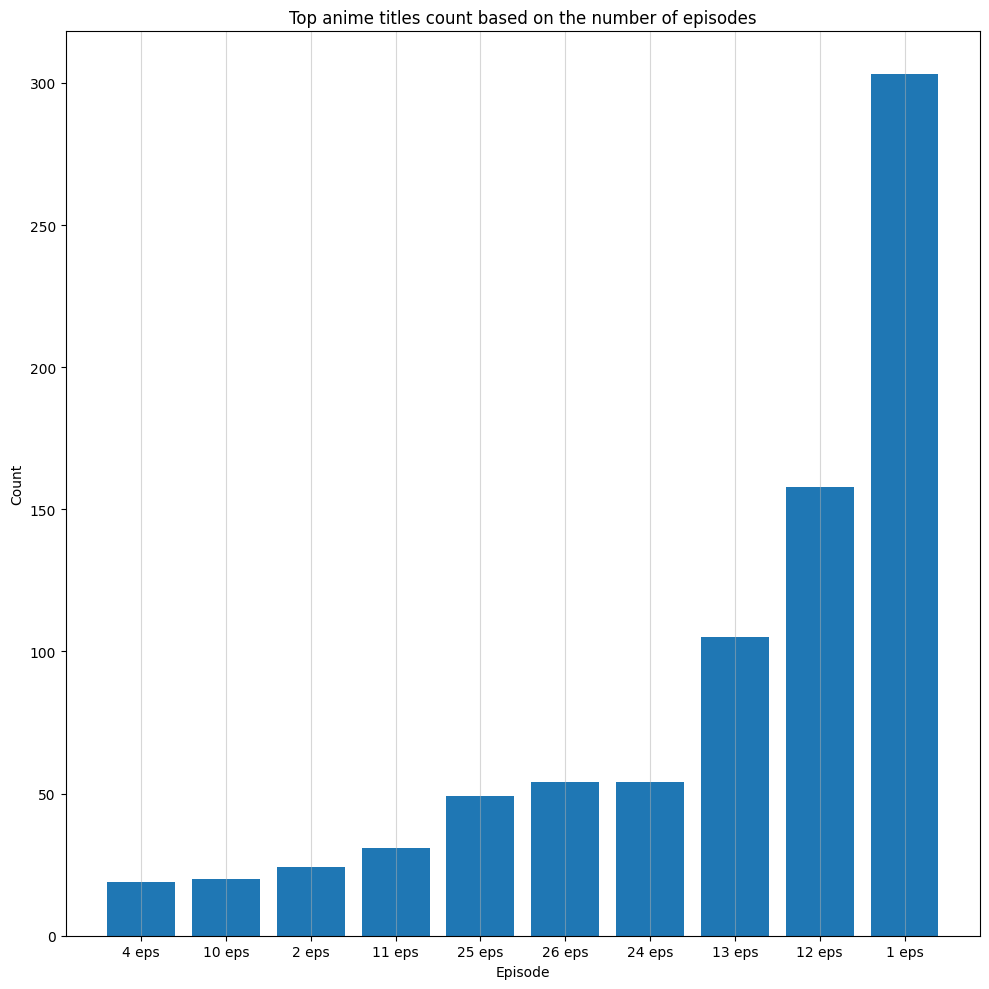

In [118]:
result_df = result_df.head(10)
result_df = result_df.sort_values(by='count', ascending=True)

plt.figure(figsize=(10, 10))
plt.bar(result_df['episode'], result_df['count'])
plt.title('Top anime titles count based on the number of episodes')
plt.xlabel('Episode')
plt.ylabel('Count')
plt.tight_layout() # adjust the layout to prevent labels from being cut off
plt.grid(True, axis='x', alpha=0.5)
# plt.xticks(rotation=45)
# plt.xlim(-0.5, 9.5)
plt.show()